In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import CleanASL as ca

from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.models import load_model

import itertools
import math 

Using TensorFlow backend.


# Import data

In [2]:
#  data is from kaggle - https://www.kaggle.com/datamunge/sign-language-mnist
testdf=pd.read_csv('sign_mnist_test.csv')
traindf=pd.read_csv('sign_mnist_train.csv')

In [3]:
traindf.shape, traindf.head()

((27455, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  


In [4]:
testdf.shape, testdf.head()

((7172, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      6     149     149     150     150     150     151     151     150   
 1      5     126     128     131     132     133     134     135     135   
 2     10      85      88      92      96     105     123     135     143   
 3      0     203     205     207     206     207     209     210     209   
 4      3     188     191     193     195     199     201     202     203   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     151  ...       138       148       127        89        82        96   
 1     136  ...        47       104       194       183       186       184   
 2     147  ...        68       166       242       227       230       227   
 3     210  ...       154       248       247       248       253       236   
 4     203  ...        26        40        64        48        29        46   
 
    pixel781  pixel782  pixel783  pixel784  
 

# EDA

In [33]:
labels = traindf['label'].values

Text(0.5, 1.0, 'Distributions Of Letters In Training Set')

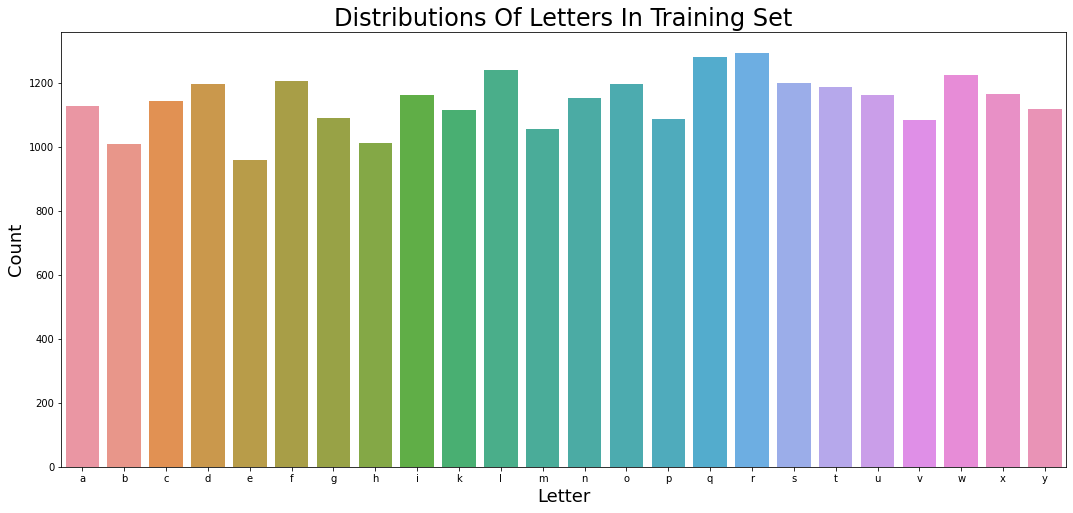

In [34]:
plt.figure(figsize = (18,8))
g=sns.countplot(x =labels)
g.set(xticklabels=['a', 'b', 'c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y'])
plt.xlabel('Letter',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Distributions Of Letters In Training Set', fontsize=24)

In [35]:
labels2 = testdf['label'].values

Text(0.5, 1.0, 'Distributions Of Letters In Test Set')

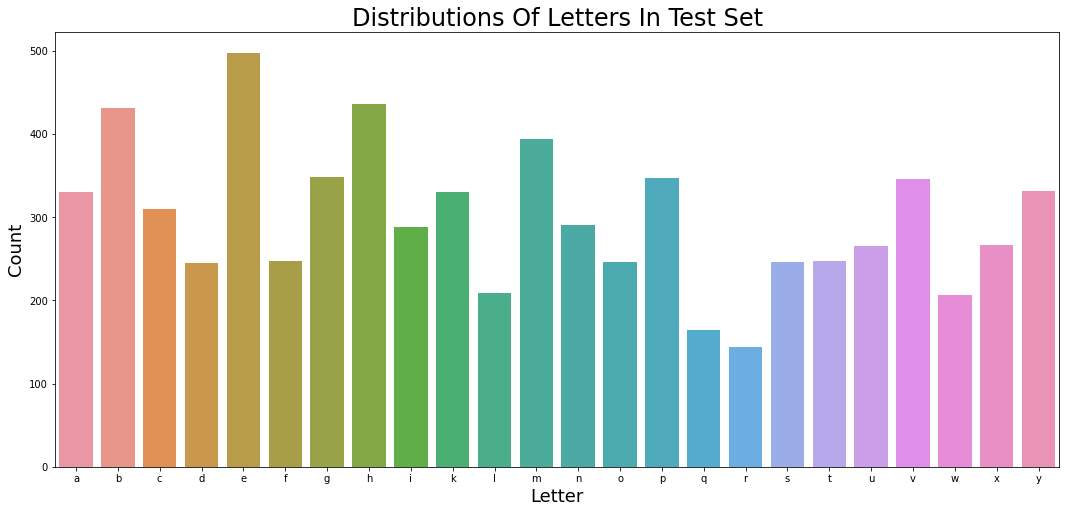

In [36]:
plt.figure(figsize = (18,8))
g=sns.countplot(x =labels2)
g.set(xticklabels=['a', 'b', 'c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y'])
plt.xlabel('Letter',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Distributions Of Letters In Test Set',fontsize=24)

# Prepping data

In [3]:
# create training labels
label = 'label'
labelstr, traindf = ca.label_creater(traindf, label)

In [4]:
# create testing labels
tlabel= 'label'
labelstt, testdf = ca.label_creater(testdf, tlabel)

In [7]:
# no 9(J) nor 25(Z)
labelstr.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [5]:
# turn test csvs into matrix, flatten, standardize
imagestest = testdf.values
imagestest = np.array([np.reshape(i, (28, 28)) for i in imagestest])
imagestest = np.array([i.flatten() for i in imagestest])
imagestest = imagestest/255

In [6]:
# turn train csvs into matrix, flatten, standardize
images = traindf.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images = images/255

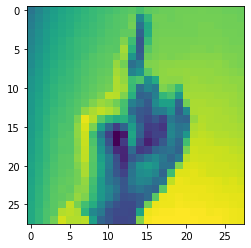

In [10]:
# turn csv into image
plt.imshow(images[0].reshape(28,28))

In [11]:
# checking label of image
labelstr[0]

3

In [7]:
# train validate split
image_train, image_val, label_train, label_val = train_test_split(images, labelstr, random_state=23, train_size=.8)

In [29]:
image_train[0].shape

(784,)

In [8]:
# turn labels into single row matrixes
num_classes = 25
label_train = keras.utils.to_categorical(label_train, num_classes)
label_val = keras.utils.to_categorical(label_val, num_classes)
labelstt = keras.utils.to_categorical(labelstt, num_classes)

#  MLP

## Sigmoid

In [9]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(25, activation='sigmoid'))

In [10]:
model.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
histoire = model.fit(image_train,
                    label_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/15
21964/21964 [==============================] - 3s 126us/step - loss: 3.2164 - accuracy: 0.0479 - val_loss: 3.2103 - val_accuracy: 0.0417
Epoch 2/15
21964/21964 [==============================] - 2s 109us/step - loss: 3.2035 - accuracy: 0.0494 - val_loss: 3.1951 - val_accuracy: 0.0492
Epoch 3/15
21964/21964 [==============================] - 3s 125us/step - loss: 3.1797 - accuracy: 0.0563 - val_loss: 3.1615 - val_accuracy: 0.0534
Epoch 4/15
21964/21964 [==============================] - 4s 189us/step - loss: 3.1272 - accuracy: 0.0622 - val_loss: 3.0919 - val_accuracy: 0.0552
Epoch 5/15
21964/21964 [==============================] - 3s 149us/step - loss: 3.0328 - accuracy: 0.0679 - val_loss: 2.9911 - val_accuracy: 0.0592
Epoch 6/15
21964/21964 [==============================] - 4s 170us/step - loss: 2.9153 - accuracy: 0.0652 - val_loss: 2.8859 - val_accuracy: 0.0605
Epoch 7/15
21964/21964 [==============================] - 4s 17

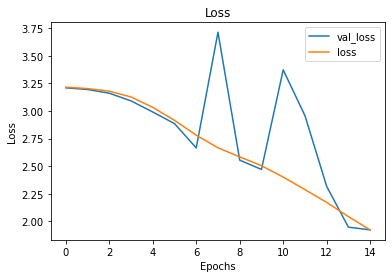

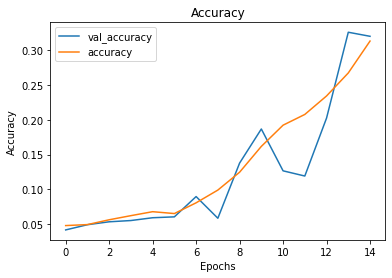

In [12]:
ca.visualize_training_results(histoire)

In [13]:
results_test1 = model.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 0s 27us/step


In [14]:
results_test1

[2.107935702209026, 0.2583658695220947]

## Softmax

In [25]:
model2 = models.Sequential()
model2.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(25, activation='softmax'))

In [26]:
model2.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history1 = model2.fit(image_train,
                    label_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/15
21964/21964 [==============================] - 4s 176us/step - loss: 3.1702 - accuracy: 0.0647 - val_loss: 3.1101 - val_accuracy: 0.0923
Epoch 2/15
21964/21964 [==============================] - 4s 180us/step - loss: 2.9502 - accuracy: 0.1202 - val_loss: 2.7700 - val_accuracy: 0.1532
Epoch 3/15
21964/21964 [==============================] - 3s 159us/step - loss: 2.4598 - accuracy: 0.2357 - val_loss: 2.9448 - val_accuracy: 0.1597
Epoch 4/15
21964/21964 [==============================] - 3s 158us/step - loss: 2.0249 - accuracy: 0.3308 - val_loss: 1.8612 - val_accuracy: 0.3821
Epoch 5/15
21964/21964 [==============================] - 3s 120us/step - loss: 1.7590 - accuracy: 0.4027 - val_loss: 1.8816 - val_accuracy: 0.3389
Epoch 6/15
21964/21964 [==============================] - 3s 128us/step - loss: 1.5547 - accuracy: 0.4730 - val_loss: 1.5371 - val_accuracy: 0.4631
Epoch 7/15
21964/21964 [==============================] - 3s 14

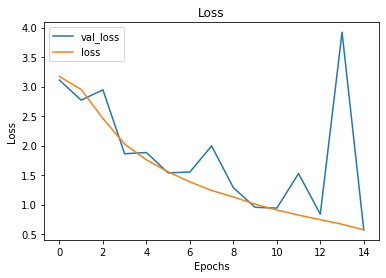

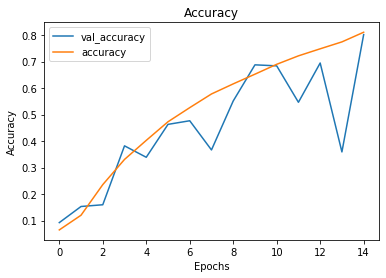

In [28]:
ca.visualize_training_results(history1)

In [30]:
results_test2 = model2.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 0s 60us/step


In [31]:
results_test2

[1.4008010051733146, 0.5974623560905457]

### Hypertuning

In [32]:
model3 = models.Sequential()
model3.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.005),))
model3.add(layers.Dense(20, activation='relu'))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(25, activation='softmax'))

In [33]:
model3.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
history3 = model3.fit(image_train,
                    label_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/15
21964/21964 [==============================] - 3s 138us/step - loss: 3.3869 - accuracy: 0.0902 - val_loss: 3.2577 - val_accuracy: 0.1302
Epoch 2/15
21964/21964 [==============================] - 3s 147us/step - loss: 3.0276 - accuracy: 0.1685 - val_loss: 2.8421 - val_accuracy: 0.1612
Epoch 3/15
21964/21964 [==============================] - 3s 140us/step - loss: 2.5397 - accuracy: 0.2405 - val_loss: 2.4085 - val_accuracy: 0.2615
Epoch 4/15
21964/21964 [==============================] - 3s 136us/step - loss: 2.2244 - accuracy: 0.3242 - val_loss: 2.0254 - val_accuracy: 0.3905
Epoch 5/15
21964/21964 [==============================] - 3s 123us/step - loss: 1.9959 - accuracy: 0.3956 - val_loss: 2.2574 - val_accuracy: 0.2954
Epoch 6/15
21964/21964 [==============================] - 3s 144us/step - loss: 1.7869 - accuracy: 0.4569 - val_loss: 2.1468 - val_accuracy: 0.3491
Epoch 7/15
21964/21964 [==============================] - 2s 11

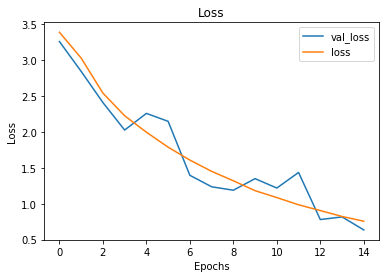

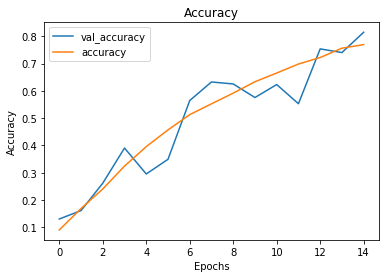

In [35]:
ca.visualize_training_results(history3)

In [36]:
results_test3 = model3.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 0s 67us/step


In [37]:
results_test3

[1.234066109848767, 0.6305075287818909]

# CNN 2d

In [17]:
image_train  = np.array([np.reshape(i, (28, 28,1)) for i in image_train])
image_val  = np.array([np.reshape(i, (28, 28,1)) for i in image_val])
imagestest  = np.array([np.reshape(i, (28, 28,1)) for i in imagestest])

In [18]:
modelcnn = models.Sequential()
modelcnn.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(28, 28,1)))
modelcnn.add(layers.MaxPooling2D((2,2)))

modelcnn.add(layers.Conv2D(64, (3,3), activation='relu'))
modelcnn.add(layers.MaxPooling2D((2,2)))

modelcnn.add(layers.Conv2D(128, (3,3), activation='relu'))
modelcnn.add(layers.MaxPooling2D((2,2)))


modelcnn.add(layers.Flatten())
modelcnn.add(layers.Dense(64, activation='relu'))
modelcnn.add(layers.Dropout(.1))

modelcnn.add(layers.Dense(25, activation='softmax'))

modelcnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [19]:
results = modelcnn.fit(image_train,
                      label_train,
                      epochs = 18,
                      batch_size=32,
                      validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/18
21964/21964 [==============================] - 28s 1ms/step - loss: 3.2068 - accuracy: 0.0429 - val_loss: 3.1959 - val_accuracy: 0.0448
Epoch 2/18
21964/21964 [==============================] - 21s 938us/step - loss: 3.1818 - accuracy: 0.0553 - val_loss: 3.1622 - val_accuracy: 0.0756
Epoch 3/18
21964/21964 [==============================] - 24s 1ms/step - loss: 3.1029 - accuracy: 0.0994 - val_loss: 2.9468 - val_accuracy: 0.1502
Epoch 4/18
21964/21964 [==============================] - 22s 1ms/step - loss: 2.6519 - accuracy: 0.1961 - val_loss: 2.2834 - val_accuracy: 0.2597
Epoch 5/18
21964/21964 [==============================] - 24s 1ms/step - loss: 2.0654 - accuracy: 0.3362 - val_loss: 1.8083 - val_accuracy: 0.4384
Epoch 6/18
21964/21964 [==============================] - 23s 1ms/step - loss: 1.5487 - accuracy: 0.5038 - val_loss: 1.2800 - val_accuracy: 0.5784
Epoch 7/18
21964/21964 [==============================] - 27s 1ms/s

In [35]:
modelcnn.save('cnn_model')

In [20]:
modelcnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

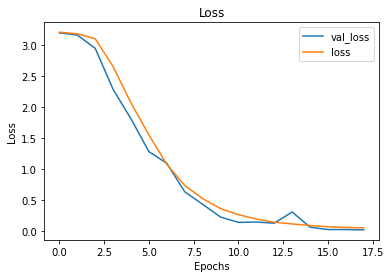

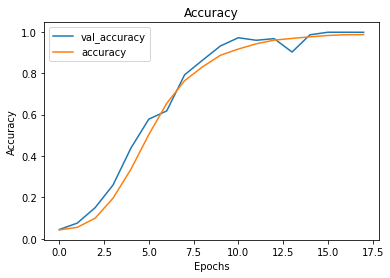

In [21]:
ca.visualize_training_results(results)

# Load saved model and evaluate

In [38]:
 # load model
modelload = load_model('cnn_model')
# summarize model.
modelload.summary()

# evaluate the model
score = modelload.evaluate(imagestest, labelstt)
print("%s: %.2f%%" % (modelload.metrics_names[1], score[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

# Saving and importing image

In [ ]:
# Save testimage
plt.imshow(imagestest[0].reshape(28,28))
plt.savefig('testplot.png')

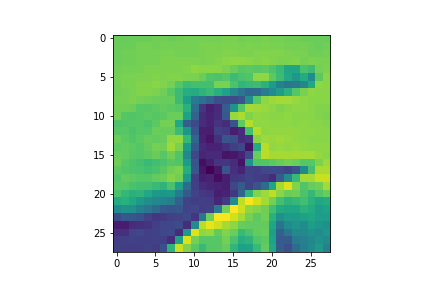

In [44]:
# Import testimage
from IPython.display import Image
Image(filename='testplot.png')

# Extracting feature map

In [47]:
imagesh  = np.array([np.reshape(imagestest[0], (28, 28,1))])
imagesh.shape

(1, 28, 28, 1)

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


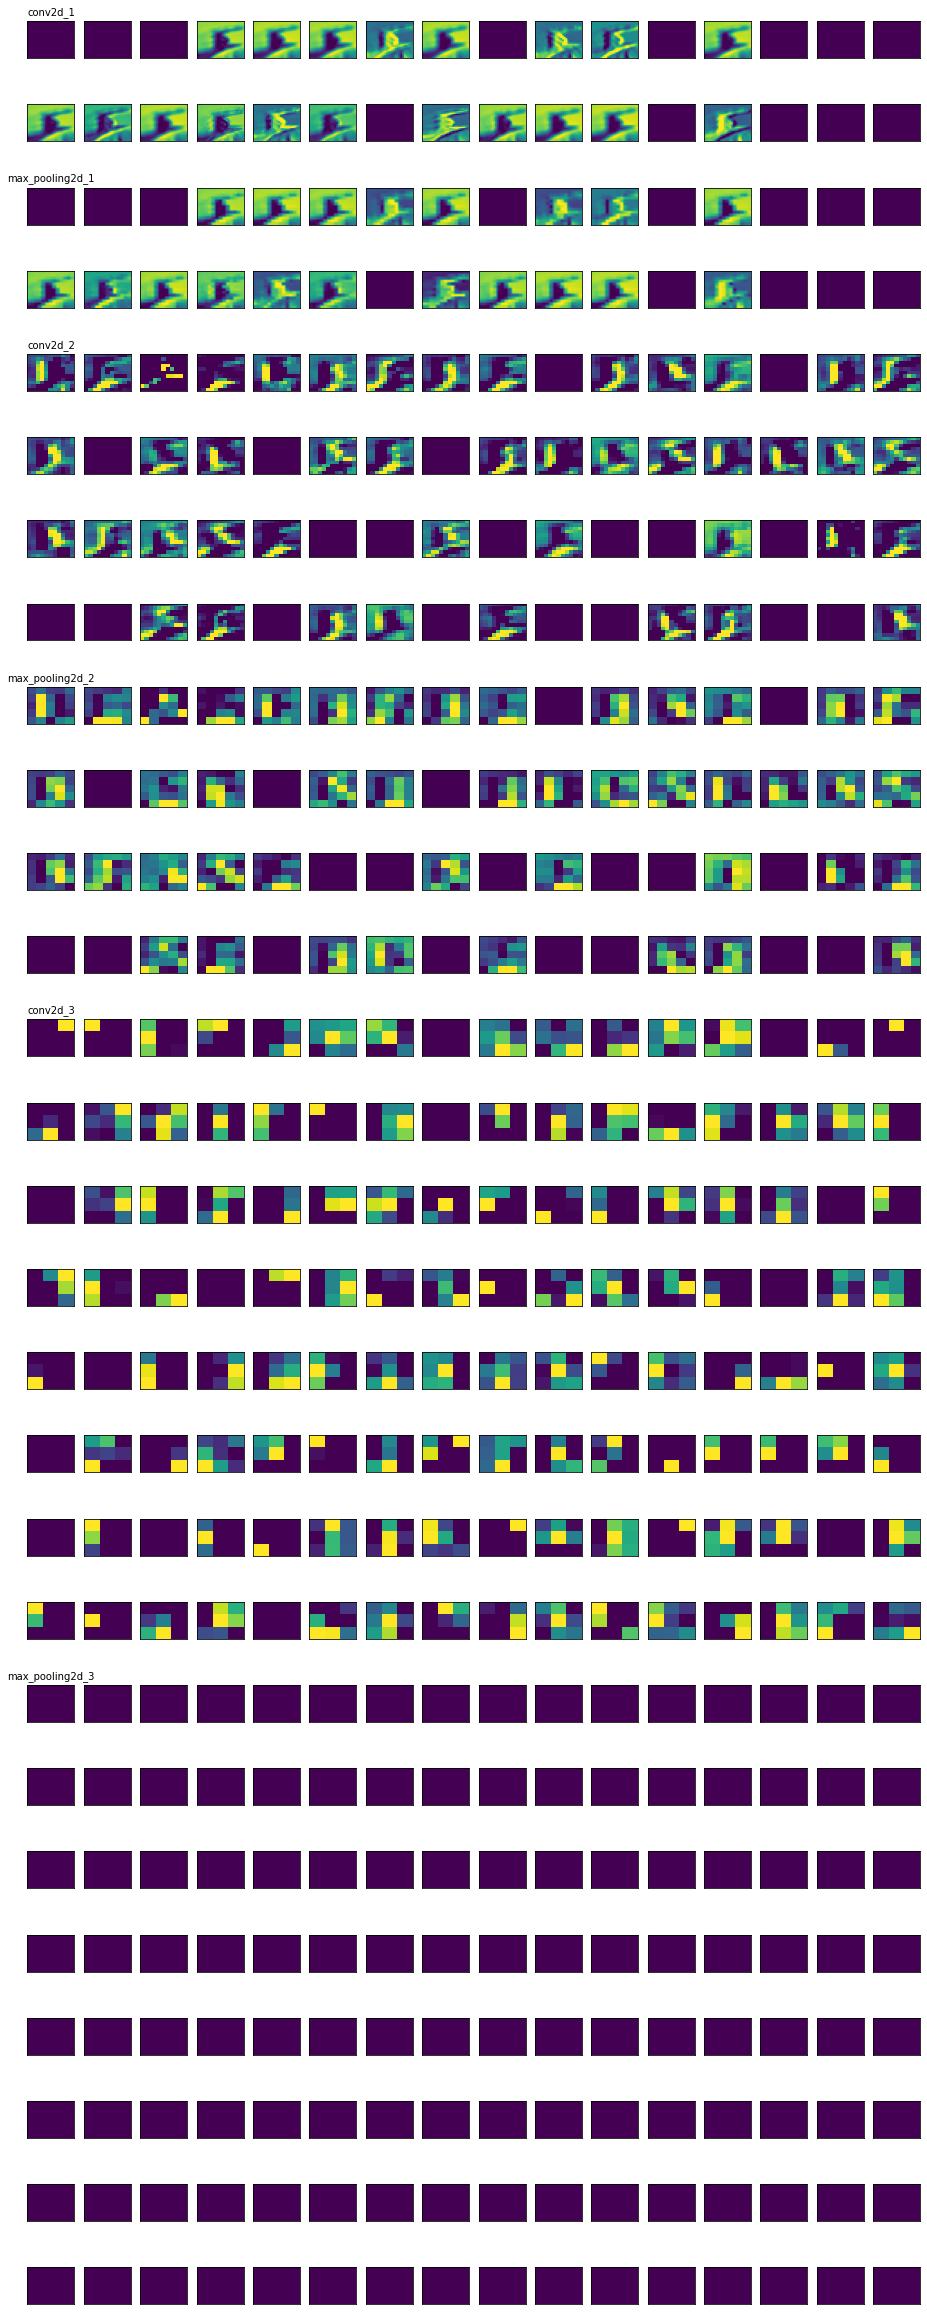

In [50]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in modelcnn.layers[:6]]

# Create a model for displaying the feature maps
activation_model = models.Model(inputs=modelcnn.input, outputs=layer_outputs)

activations = activation_model.predict(imagesh)

# Extract Layer Names for Labelling
layer_names = []
for layer in modelcnn.layers[:6]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 16
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                          :,
                                         :,
                                         ch_idx]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()

# Confusion Matrix

In [51]:
prediction = modelcnn.predict(imagestest)

In [52]:
rounded_labels=np.argmax(labelstt, axis=1)

In [53]:
rounded_prediction=np.argmax(prediction, axis=1)

In [15]:
print(len(rounded_labels))
print(len(rounded_prediction))
len(rounded_labels)==len(rounded_prediction)

7172
7172


True

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels,rounded_prediction)
classes = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest',aspect='equal', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", 
#                  verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[269   0   0   0  40   0   0   0   1   0   0   0  21   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 411   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  21   0   0   0   0]
 [  0   0 268   0   0   0   0   0   0   0   0   0   0  42   0   0   0   0
    0   0   0   0   0   0]
 [  1   0   0 207   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  20  17   0   0   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0]
 [  0   0   0   0   0  21 231   2   0   0   0   0   0   0   4  24   0   0
   45   0  21   0   0   0]
 [  0   0   0   0   0   0  21 371   0   0   0   5   2   0  18   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 267   0   0   0   0   0   0   0   0   0
    0   0   0  21   0   0]
 [  0   0   0   0   0   0   0   0   0 238   0   0  

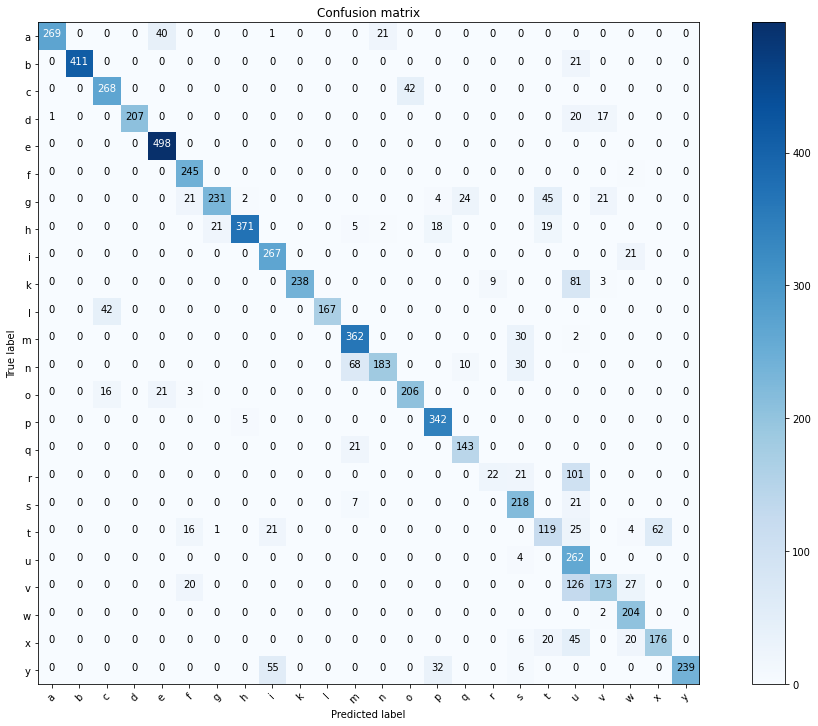

In [56]:
plt.figure(figsize=(15,10))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [19]:
# False Neg Error
errorrow=[]
for i in range(24):
    diag = cm[i][i]
    rest = sum(cm[i])- diag
    error_rate = round((rest/(diag+rest))*100,2)
    errorrow.append(error_rate)
errorrow

[18.73,
 4.86,
 13.55,
 15.51,
 0.0,
 0.81,
 33.62,
 14.91,
 7.29,
 28.1,
 20.1,
 8.12,
 37.11,
 16.26,
 1.44,
 12.8,
 84.72,
 11.38,
 52.02,
 1.5,
 50.0,
 0.97,
 34.08,
 28.01]

In [24]:
final = pd.DataFrame(errorrow).rename(columns={0: "error %"}).set_index([pd.Index(['a', 'b', 'c', 'd','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y'])])
final = final.sort_values(by='error %',ascending = False)
final.head(10)

,error %
r,84.72
t,52.02
v,50.00
n,37.11
x,34.08
g,33.62
k,28.10
y,28.01
l,20.10
a,18.73


In [25]:
print('Letters With Most Errors:',final.head(3))
print('Letters With Least Errors:',final.tail(3))

Letters With Most Errors:    error %
r    84.72
t    52.02
v    50.00
Letters With Least Errors:    error %
w     0.97
f     0.81
e     0.00


In [26]:
# False Pos
errorcol=[]
for i in range(24):
    diag2 = cm[i][i]
    rest2 = sum(cm.T[i])- diag2
    error_rate2 = round((rest2/(diag2+rest2))*100,2)
    errorcol.append(error_rate2)
errorcol

[0.37,
 0.0,
 17.79,
 0.0,
 10.91,
 19.67,
 8.7,
 1.85,
 22.38,
 0.0,
 0.0,
 21.81,
 11.17,
 16.94,
 13.64,
 19.21,
 29.03,
 30.79,
 41.38,
 62.78,
 19.91,
 26.62,
 26.05,
 0.0]

In [27]:
final2 = pd.DataFrame(errorcol).rename(columns={0: "error %"}).set_index([pd.Index(['a', 'b', 'c', 'd','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y'])])
final2 = final2.sort_values(by='error %',ascending = False)
final2.head(10)

,error %
u,62.78
t,41.38
s,30.79
r,29.03
w,26.62
x,26.05
i,22.38
m,21.81
v,19.91
f,19.67


In [34]:
print('Most Misclassified Letters:',final2.head(2))
print('Best Classified Letters:',final2.tail(5))

Most Misclassified Letters:    error %
u    62.78
t    41.38
Best Classified Letters:    error %
a     0.37
b     0.00
l     0.00
k     0.00
d     0.00
y     0.00
